In [9]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

# Specification

In [28]:
POINTING_ACCURACY = 5 * np.pi/180 # radians

# Design

In [55]:
PLATFORM_SIDE = 3 # m, side length of the platform
ang = 2 * np.pi / 3
platform_v1 = PLATFORM_SIDE * np.array([np.cos(0*ang), np.sin(0*ang), 0])
platform_v2 = PLATFORM_SIDE * np.array([np.cos(1*ang), np.sin(1*ang), 0])
platform_v3 = PLATFORM_SIDE * np.array([np.cos(2*ang), np.sin(2*ang), 0])
platform_vertices = np.array([platform_v1, platform_v2, platform_v3])
platform_sides = np.array([platform_v2-platform_v1,
                           platform_v3-platform_v2,
                           platform_v1-platform_v3])

In [58]:
ANCHOR_LEN = 100 # m, length of rope
PITCH_ANGLE = np.pi / 6 # angle from flat
anchor_v1 = ANCHOR_LEN * np.array([np.cos(0*ang)*np.cos(PITCH_ANGLE), np.sin(0*ang)*np.cos(PITCH_ANGLE), np.sin(PITCH_ANGLE)])
anchor_v2 = ANCHOR_LEN * np.array([np.cos(1*ang)*np.cos(PITCH_ANGLE), np.sin(1*ang)*np.cos(PITCH_ANGLE), np.sin(PITCH_ANGLE)])
anchor_v3 = ANCHOR_LEN * np.array([np.cos(2*ang)*np.cos(PITCH_ANGLE), np.sin(2*ang)*np.cos(PITCH_ANGLE), np.sin(PITCH_ANGLE)])
anchor_vertices = np.array([anchor_v1, anchor_v2, anchor_v3])

<IPython.core.display.Javascript object>


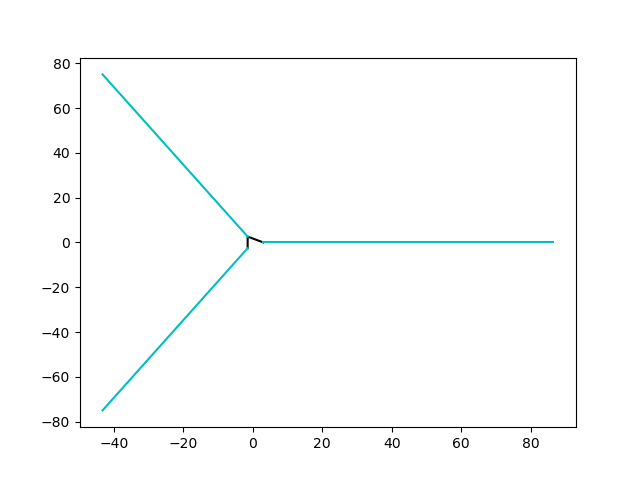

In [59]:
plt.figure()
plt.plot(platform_vertices[:,0], platform_vertices[:,1], 'k')
for p,a in zip(platform_vertices, anchor_vertices):
    plt.plot([p[0], a[0]], [p[1], a[1]], 'c')

# Check

In [62]:
platform_normal = np.cross(platform_sides[0], platform_sides[1])
platform_angle = np.arccos(platform_normal[2] / np.linalg.norm(platform_normal))
assert(np.abs(platform_angle) < POINTING_ACCURACY)
print(platform_normal, platform_angle, POINTING_ACCURACY)

[ 0.         0.        23.3826859] 0.0 0.08726646259971647


<IPython.core.display.Javascript object>


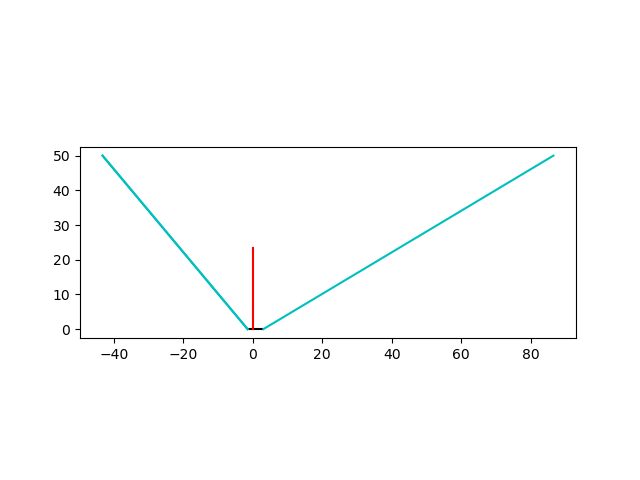

(-49.79646071760527, 93.09773090682717, -2.5, 52.49999999999999)

In [63]:
plt.figure()
plt.plot(platform_vertices[:,0], platform_vertices[:,2], 'k')
for p,a in zip(platform_vertices, anchor_vertices):
    plt.plot([p[0], a[0]], [p[2], a[2]], 'c')
plt.plot([0,platform_normal[0]], [0,platform_normal[2]], 'r')
plt.axis('image')